Dataset health_data.csv is relevant to this question, and the column is_diabetic is the dependent variable of this dataset.

a. This dataset has problem(s). Identify and report. [2 marks]

b. Rectify the problem(s) you have identified. List the steps taken and justify your approach. [2 marks]

c.
Split the final dataset into train and test sets (80-20 split) using random sampling. [1 mark]

d.
Train a classifier of your choice to predict the dependent variable. [1 mark]

e.
Using the classifier you have created, calculate and report at least four metrics based on the test set. Comment briefly on the model performance based on these metrics. [2 marks]

f.
How could feature engineering or domain knowledge improve preprocessing or model performance in this problem? [2 marks]

In [114]:
# prompt: read health_data.csv from runtime

import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import io

df = pd.read_csv('health_data.csv')

In [115]:
df.head()

,_f8,_f1,_f2,_f3,_f4,_f5,_f6,_f7,is_diabetic
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [116]:
# a.) This dataset has problem(s). Identify and report. [2 marks]

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _f8          741 non-null    int64  
 1   _f1          704 non-null    float64
 2   _f2          704 non-null    float64
 3   _f3          704 non-null    float64
 4   _f4          704 non-null    float64
 5   _f5          704 non-null    float64
 6   _f6          741 non-null    float64
 7   _f7          741 non-null    int64  
 8   is_diabetic  741 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 52.2 KB


,_f8,_f1,_f2,_f3,_f4,_f5,_f6,_f7,is_diabetic
count,741.000000,704.000000,704.000000,704.000000,704.000000,704.000000,741.000000,741.000000,741.000000
mean,3.825911,114.634943,65.400568,19.424716,77.575284,30.430682,0.469317,33.064777,0.350877
std,3.362460,40.957897,24.027694,15.728041,114.918401,10.257448,0.325670,11.626211,0.477567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,96.000000,60.000000,0.000000,0.000000,26.175000,0.241000,24.000000,0.000000
50%,3.000000,115.000000,70.000000,21.000000,0.000000,31.600000,0.374000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,125.000000,36.100000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,52.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [117]:
df.isnull().sum() # 37 Null values in 5 columns out of 8 variables. No null values identified in target variable.

,0
_f8,0
_f1,37
_f2,37
_f3,37
_f4,37
_f5,37
_f6,0
_f7,0
is_diabetic,0


In [118]:
# prompt: find out all the rows in df where _f1, _f2, _f3, _f4, _f5 are null or 0 at the same time. replace NaN values with 0.

import pandas as pd

# Assuming df is already loaded as in your provided code

# Replace NaN with 0
df.fillna(0, inplace=True)

# Find rows where '_f1', '_f2', '_f3', '_f4', '_f5' are all null or 0
# Assuming '_f1', '_f2', '_f3', '_f4', '_f5' are present in your dataframe, otherwise adjust the column names.
all_zero_rows = df[
    (df['_f1'] == 0) &
    (df['_f2'] == 0) &
    (df['_f3'] == 0) &
    (df['_f4'] == 0) &
    (df['_f5'] == 0)
]

all_zero_rows


,_f8,_f1,_f2,_f3,_f4,_f5,_f6,_f7,is_diabetic
30,5,0.0,0.0,0.0,0.0,0.0,0.546,60,0
31,3,0.0,0.0,0.0,0.0,0.0,0.851,28,1
33,6,0.0,0.0,0.0,0.0,0.0,0.188,28,0
39,4,0.0,0.0,0.0,0.0,0.0,1.390,56,1
54,7,0.0,0.0,0.0,0.0,0.0,0.718,42,0
...,...,...,...,...,...,...,...,...,...
693,4,0.0,0.0,0.0,0.0,0.0,0.317,34,0
707,2,0.0,0.0,0.0,0.0,0.0,0.560,53,0
727,8,0.0,0.0,0.0,0.0,0.0,0.443,45,1
733,2,0.0,0.0,0.0,0.0,0.0,0.766,22,0


In [119]:
# prompt: find out all the rows in df where _f8, _f6, _f7 are null or 0

# Assuming df is already loaded as in your provided code

# Find rows where '_f8', '_f6', '_f7' are null or 0
# Adjust column names if necessary
all_zero_rows = df[
    (df['_f8'].isnull() | (df['_f8'] == 0)) &
    (df['_f6'].isnull() | (df['_f6'] == 0)) &
    (df['_f7'].isnull() | (df['_f7'] == 0))
]

all_zero_rows


,_f8,_f1,_f2,_f3,_f4,_f5,_f6,_f7,is_diabetic


In [120]:
# prompt: count the number of duplicates and drop them

# Count duplicates based on all columns
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {len(df)}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 741


In [121]:
# prompt: count number of 0s in each column

# Assuming df is your DataFrame as defined in the previous code

zero_counts = (df == 0).sum()
zero_counts


,0
_f8,108
_f1,77
_f2,102
_f3,266
_f4,390
_f5,81
_f6,0
_f7,0
is_diabetic,481


> Here _f4 has 390 zeros

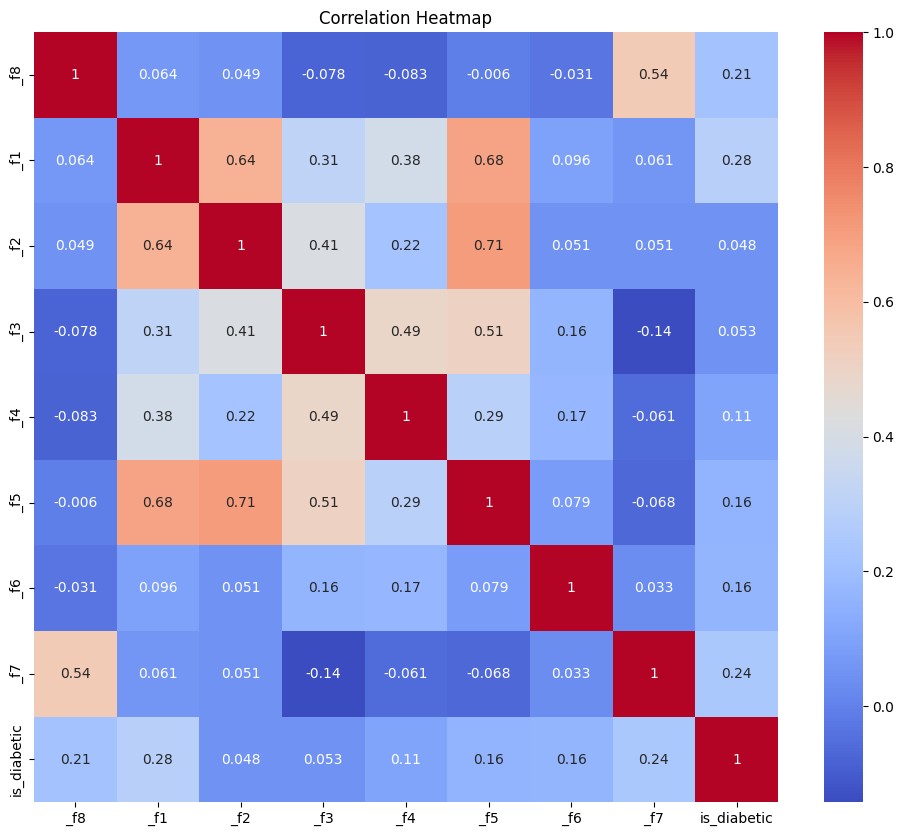

In [122]:
# prompt: plot correlation heatmap for all the columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the previous code.
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


> _f2 and _f3 has no correlation with the target variable.

In [123]:
# prompt: identify IQR range for all the columns and find out the outliers, along with the percentage of data

def detect_outliers_iqr(df):
    outlier_percentages = {}
    for col in df.select_dtypes(include=['number']).columns:  # Only numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100
        outlier_percentages[col] = {
            'outliers': outliers,  # DataFrame of outlier rows for this column
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'iqr' : IQR
        }
    return outlier_percentages


outlier_info = detect_outliers_iqr(df)


for col, info in outlier_info.items():
  print(f"Column: {col}")
  print("IQR:", info['iqr'])
  print("Lower Bound:", info['lower_bound'])
  print("Upper Bound:", info['upper_bound'])
  print(f"Number of outliers: {len(info['outliers'])}")
  print(f"Percentage of outliers: {info['percentage']:.2f}%")
  print(info['outliers']) # prints the outlier rows
  print("-" * 20)


Column: _f8
IQR: 5.0
Lower Bound: -6.5
Upper Bound: 13.5
Number of outliers: 4
Percentage of outliers: 0.54%
     _f8    _f1   _f2   _f3    _f4   _f5    _f6  _f7  is_diabetic
84    15  136.0  70.0  32.0  110.0  37.1  0.153   43            1
152   17  163.0  72.0  41.0  114.0  40.9  0.817   47            1
290   14  100.0  78.0  25.0  184.0  36.6  0.412   46            1
439   14  175.0  62.0  30.0    0.0  33.6  0.212   38            1
--------------------
Column: _f1
IQR: 45.0
Lower Bound: 24.5
Upper Bound: 204.5
Number of outliers: 77
Percentage of outliers: 10.39%
     _f8  _f1  _f2  _f3  _f4  _f5    _f6  _f7  is_diabetic
30     5  0.0  0.0  0.0  0.0  0.0  0.546   60            0
31     3  0.0  0.0  0.0  0.0  0.0  0.851   28            1
33     6  0.0  0.0  0.0  0.0  0.0  0.188   28            0
39     4  0.0  0.0  0.0  0.0  0.0  1.390   56            1
54     7  0.0  0.0  0.0  0.0  0.0  0.718   42            0
..   ...  ...  ...  ...  ...  ...    ...  ...          ...
693    4  0.0 

> Problems identified with the dataset:

Null values: this dataset has 72 rows of null or 0 values in 5 of the 8 variables(_f1, _f2, _f3, _f4, _f5). this is a significant number and cannot be ignored: ~10% of the data. _f4 column has 390 zeros.

_f2 and _f3 has low correlation with the target variable( < .1)

Outliers: Almost all the variable columns has outliers.

Solution: We cannot drop this data as we will loose significant amount of data. we can perform imputation strategies to replace 0's and outliers.

Also, we can drop _f2 and _f3 as they have very low correlation with the target variable.

We can also drop _f4 as it has a lot of 0's in its data = 390 zeros, which is not useful.


# b) Rectify the problem(s) you have identified. List the steps taken and justify your approach.
> Dropping _f2, _f3 as they have low correlation with target variable
> Dropping _f4 as it has a lot of zeros - no point imputing this column
> replacing outliers in other columns with the median value


In [124]:
# prompt: drop _f2 and _f3 and _f4 columns from df. check if column exists first

# Assuming df is your DataFrame as defined in the previous code.

if '_f2' in df.columns:
  df = df.drop('_f2', axis=1)
if '_f3' in df.columns:
  df = df.drop('_f3', axis=1)
if '_f4' in df.columns:
  df = df.drop('_f4', axis=1)


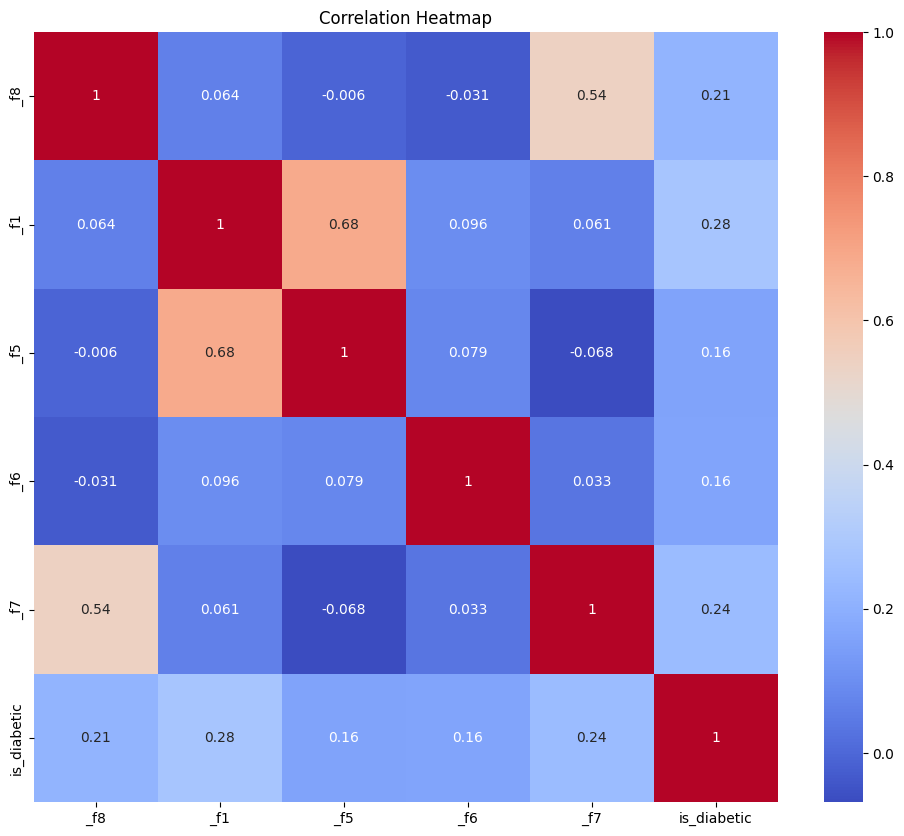

In [125]:
# prompt: correlation heatmap

# Assuming 'df' is your DataFrame as defined in the previous code.
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


F1 and _f5 are highly correlated. we can drop one of the variable to improve model performance:

In [126]:
# prompt: dropping _f5

if '_f5' in df.columns:
  df = df.drop('_f5', axis=1)


In [127]:
# prompt: perform imputation strategy on _f1 and _f8 columns, replace 0's with mean of the column

# Assuming df is your DataFrame as defined in the previous code.

# Impute 0 values in '_f1' and '_f8' with the mean of each column
for col in ['_f1', '_f8']:
    if col in df.columns:  # Check if the column exists in the DataFrame
        mean_val = df[col].replace(0, pd.NA).mean()  # Calculate the mean excluding zeros.
        df[col] = df[col].replace(0, mean_val) # Replace 0's with the calculated mean


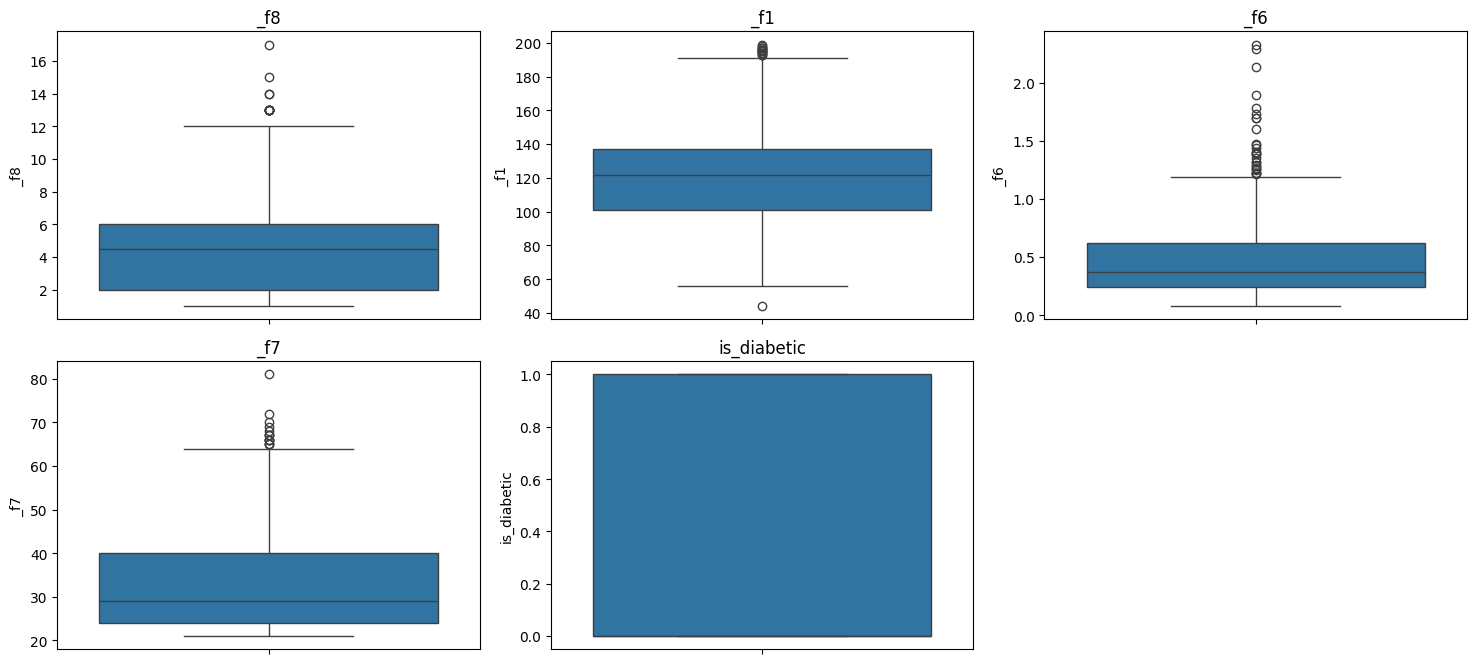

In [128]:
# prompt: plot boxplot for all the columns

# Assuming 'df' is your DataFrame from the previous code
# Plot boxplots for all numerical variables
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust the grid based on the number of columns
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Still we can see a lot of outliers. let us relace them with the median of the respective columns.

In [129]:
# prompt: perform imputation on all columns, replace outliers with the median of the column.

# Assuming 'df' is your DataFrame from the previous code
for col in df.select_dtypes(include=['number']).columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median_val = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val


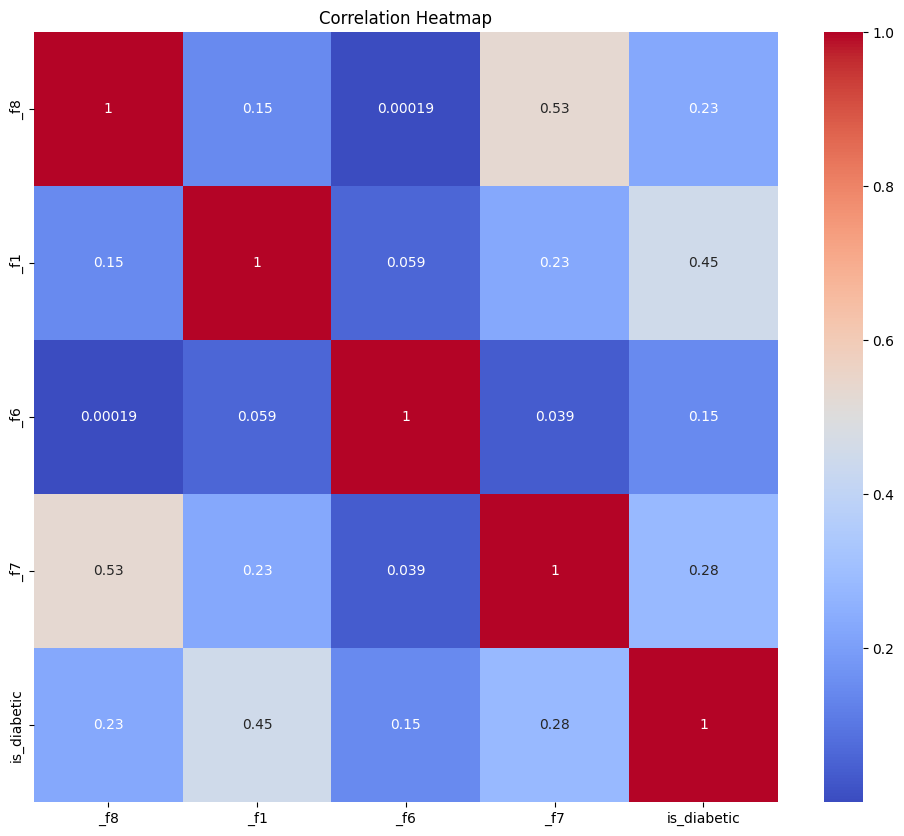

In [130]:
# prompt: create correlation heatmap

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [131]:
# prompt: is_diabetic is target variable, Split the final dataset into train and test sets (80-20 split) using random sampling

# Assuming 'df' is your DataFrame as defined in the previous code
X = df.drop('is_diabetic', axis=1)
y = df['is_diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [132]:
# prompt: Train random forest classifier to predict the dependent variable.

# d. Train a classifier of your choice to predict the dependent variable. [1 mark]
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# e. Using the classifier you have created, calculate and report at least four metrics based on the test set. Comment briefly on the model performance based on these metrics. [2 marks]
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# f. How could feature engineering or domain knowledge improve preprocessing or model performance in this problem? [2 marks]
# Feature engineering and domain knowledge could improve model performance by creating additional relevant features.
# For example, combining features like '_f1' and '_f5' to create a composite feature may be relevant.
# Domain knowledge could help to identify non-linear interactions and relationships between features, potentially improving model prediction accuracy.


Accuracy: 0.6510067114093959
Precision: 0.4878048780487805
Recall: 0.39215686274509803
F1-score: 0.43478260869565216


d.) Train a classifier of your choice to predict the dependent variable. [1 mark]

In [133]:
# prompt: Train Logistic regression classifier to predict the dependent variable.

from sklearn.linear_model import LogisticRegression

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters if needed
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model (example metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Logistic Regression Precision: {precision_logreg}")
print(f"Logistic Regression Recall: {recall_logreg}")
print(f"Logistic Regression F1-score: {f1_logreg}")


Logistic Regression Accuracy: 0.6912751677852349
Logistic Regression Precision: 0.5609756097560976
Logistic Regression Recall: 0.45098039215686275
Logistic Regression F1-score: 0.5


In [134]:
# prompt: Train a SVC to predict the dependent variable.

from sklearn.svm import SVC

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the SVC model
svc_classifier = SVC(random_state=42)  # You can adjust hyperparameters if needed
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc_classifier.predict(X_test)

# Evaluate the model (example metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"SVC Accuracy: {accuracy_svc}")
print(f"SVC Precision: {precision_svc}")
print(f"SVC Recall: {recall_svc}")
print(f"SVC F1-score: {f1_svc}")


SVC Accuracy: 0.7046979865771812
SVC Precision: 0.6206896551724138
SVC Recall: 0.35294117647058826
SVC F1-score: 0.45


>e.) Using the classifier you have created, calculate and report at least four metrics based on the test set. Comment briefly on the model performance based on these metrics

Logistics regression:
Logistic Regression Accuracy: 0.6912751677852349

Logistic Regression Precision: 0.5609756097560976

Logistic Regression Recall: 0.45098039215686275

Logistic Regression F1-score: 0.5

This model is okay for predicting Positive class, but struggles with negative class.



f.) How could feature engineering or domain knowledge improve preprocessing or model performance in this problem?

A: with domain knowledge, we would know what would be the best value to replace 0 or NaN values, we would know how to handle outliers better.
this would significantly improve model performance.
